In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
     

In [2]:
for dirpath,dirnames,filenames in os.walk("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 2 directories and 0 images in 'C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE'.
there are 0 directories and 536 images in 'C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE\covid'.
there are 0 directories and 668 images in 'C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE\normal'.


In [3]:
data_dir = pathlib.Path("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal'], dtype='<U6')

In [4]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['covid1900457.png']
image shape (480, 640, 3)


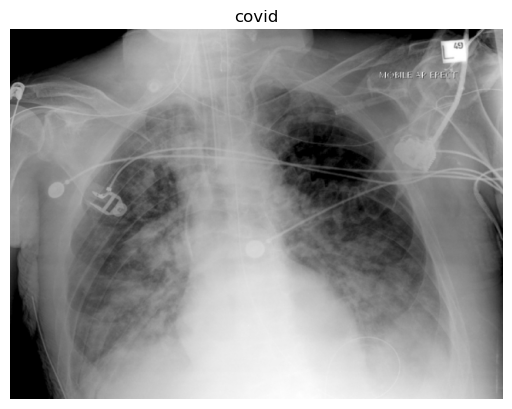

In [5]:
img = view_image("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/","covid")

['IM-0097-0001.jpeg']
image shape (925, 1558)


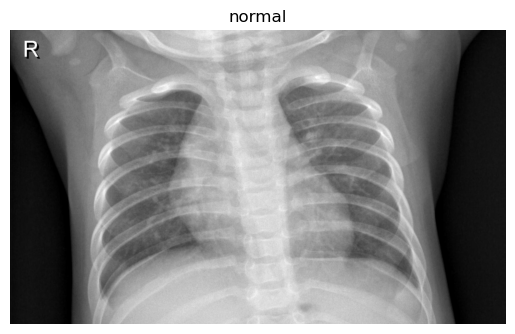

In [6]:
img = view_image("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/","normal")

In [5]:
data=[]
labels=[]
covid=os.listdir("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [6]:
normal=os.listdir("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [7]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=10)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [20]:
epochs=10

In [11]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=2, activation="sigmoid"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
     


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [13]:
history=model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 101s 5s/step - loss: 0.8424 - accuracy: 0.6973 - val_loss: 0.4492 - val_accuracy: 0.8512
Epoch 2/10
22/22 [==============================] - 99s 5s/step - loss: 0.3282 - accuracy: 0.8976 - val_loss: 0.5354 - val_accuracy: 0.8166
Epoch 3/10
22/22 [==============================] - 99s 5s/step - loss: 0.2086 - accuracy: 0.9139 - val_loss: 0.2220 - val_accuracy: 0.9239
Epoch 4/10
22/22 [==============================] - 99s 5s/step - loss: 0.1601 - accuracy: 0.9392 - val_loss: 0.2645 - val_accuracy: 0.8962
Epoch 5/10
22/22 [==============================] - 99s 5s/step - loss: 0.1683 - accuracy: 0.9362 - val_loss: 0.2038 - val_accuracy: 0.9377
Epoch 6/10
22/22 [==============================] - 99s 4s/step - loss: 0.1018 - accuracy: 0.9644 - val_loss: 0.1432 - val_accuracy: 0.9585
Epoch 7/10
22/22 [==============================] - 99s 5s/step - loss: 0.0650 - accuracy: 0.9763 - val_loss: 0.1172 - val_accuracy: 0.9550
Epoch 8/10
22/22 [=

In [15]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 7s 853ms/step - loss: 0.2069 - accuracy: 0.9668


[0.20689351856708527, 0.9668049812316895]

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

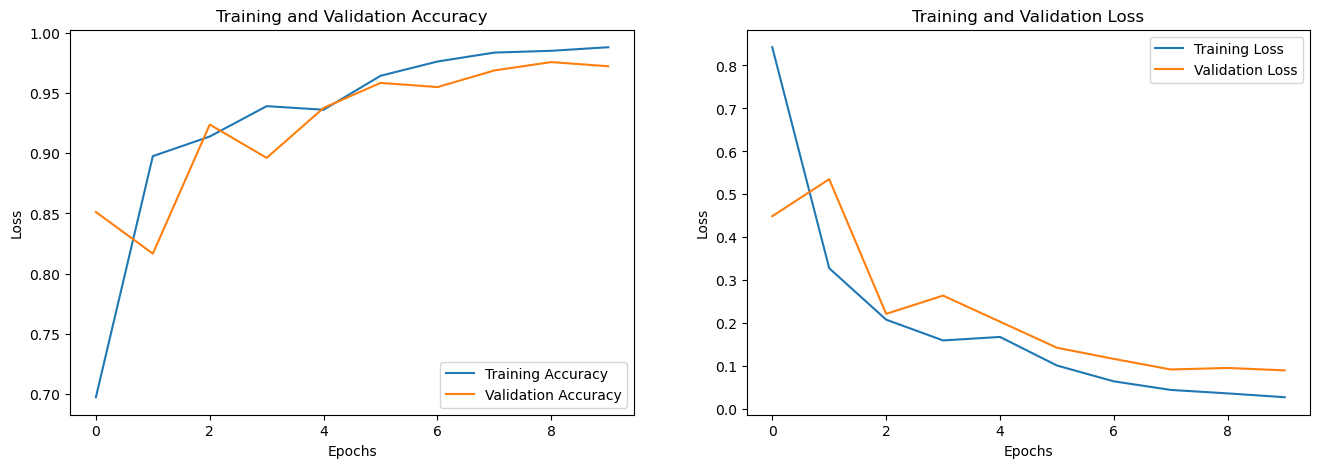

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
y_pred=model.predict(X_test)

8/8 [==============================] - 7s 775ms/step


In [26]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)
    
   

In [28]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       118
           1       0.95      0.98      0.97       123

    accuracy                           0.97       241
   macro avg       0.97      0.97      0.97       241
weighted avg       0.97      0.97      0.97       241



Text(95.72222222222221, 0.5, 'Truth')

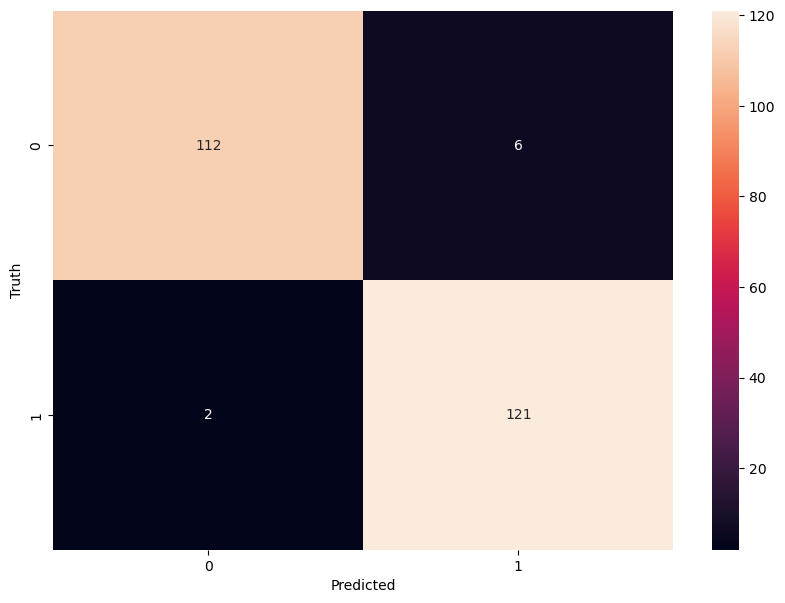

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

In [34]:
sensitivity=(tp/(tp+fn))
print("The sensitivity is","{:.2f}".format(sensitivity*100),"%")

The sensitivity is 98.25 %


In [35]:
specificity=(tn/(tn+fp))
print("The specificity is","{:.2f}".format(specificity*100),"%")

The specificity is 95.28 %


Image to predict


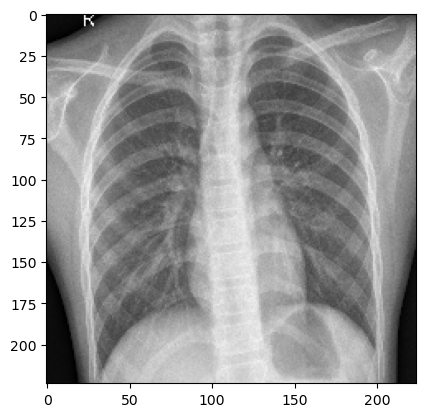

In [42]:
from tensorflow.keras.preprocessing import image
img_pred=image.load_img(r"C:/Users/Arman/DeepLearning/Newcode/COVID_IEEE/normal/IM-0046-0001.jpeg",target_size=(224,224))
print("Image to predict")
plt.imshow(img_pred)

In [43]:
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

result=model.predict(img_pred)
result=result.ravel()
#print(result)
if result[0]>0.5:
    print("Covid Positive")
else:
    print("Covid Negative")

1/1 [==============================] - 0s 52ms/step
Covid Negative


In [10]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 968s 56us/step


In [12]:
mobile_net_model = Flatten()(base_model.output)

mobile_net_model = Dense(units=1024, activation="relu")(mobile_net_model)
mobile_net_model = Dense(units=512, activation="relu")(mobile_net_model)
mobile_net_model = Dense(units=256, activation="relu")(mobile_net_model)

prediction_layer = Dense(units=2, activation="softmax")(mobile_net_model)

In [13]:
mobile_net_model = Model(inputs = base_model.input, outputs = prediction_layer)
mobile_net_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
mobile_net_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [23]:
history=mobile_net_model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 21s 973ms/step - loss: 9.8902e-07 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9965
Epoch 2/10
22/22 [==============================] - 21s 945ms/step - loss: 9.4430e-07 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9965
Epoch 3/10
22/22 [==============================] - 21s 982ms/step - loss: 9.3582e-07 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9965
Epoch 4/10
22/22 [==============================] - 21s 973ms/step - loss: 8.8650e-07 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9965
Epoch 5/10
22/22 [==============================] - 21s 960ms/step - loss: 8.6723e-07 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9965
Epoch 6/10
22/22 [==============================] - 20s 941ms/step - loss: 8.6741e-07 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9965
Epoch 7/10
22/22 [==============================] - 21s 957ms/step - loss: 8.2799e-07 - accuracy: 1.0000 - val_loss: 0

In [24]:
mobile_net_model.evaluate(X_test,y_test)

8/8 [==============================] - 4s 521ms/step - loss: 0.2018 - accuracy: 0.9876


[0.20175448060035706, 0.9875518679618835]

In [31]:
y_pred=mobile_net_model.predict(X_test)

8/8 [==============================] - 6s 658ms/step


In [32]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [33]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [34]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       118
           1       0.98      0.99      0.99       123

    accuracy                           0.99       241
   macro avg       0.99      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241



Text(70.72222222222221, 0.5, 'Truth')

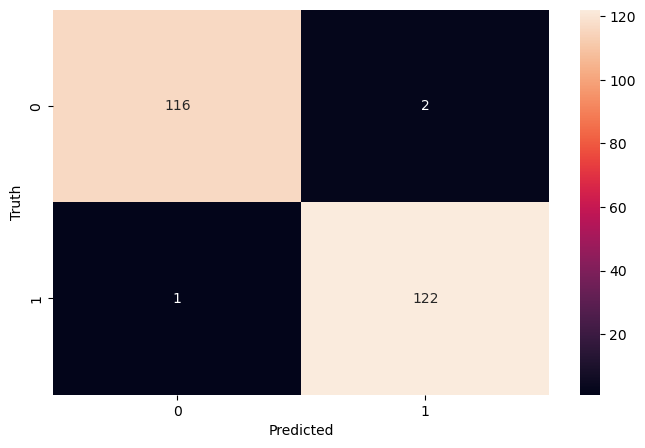

In [39]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

In [37]:
sensitivity=(tp/(tp+fn))
print("The sensitivity is","{:.2f}".format(sensitivity*100),"%")

The sensitivity is 99.15 %


In [38]:
specificity=(tn/(tn+fp))
print("The specificity is","{:.2f}".format(specificity*100),"%")

The specificity is 98.39 %
